In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [2]:
def pca_transformation(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])
    return principal_df

In [3]:

small_iris_data = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/small_iris.csv")
iris_data = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/iris.csv")
mall_customer_data = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/Mall_Customers.csv")


In [4]:
mall_customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data analys 

Denna dataset innehåller 150 datapunkter och 2 attributer

In [5]:
small_iris_data.shape

(150, 2)


### ■ Innehåller datan konstiga värden?

Nej det finns inte som ni ser på visualiseringen nedan för dataset som vi jobbar med att det inte finns värde som sticker ut från de övriga de ser ganska ihopslagna ut. annars bör finnas några som sticker ut för att det ska finnas extremtvärde. 

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

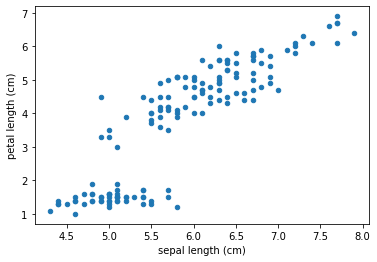

In [6]:
small_iris_data.plot.scatter(x="sepal length (cm)", y = "petal length (cm)")


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'petal length (cm)'}>]], dtype=object)

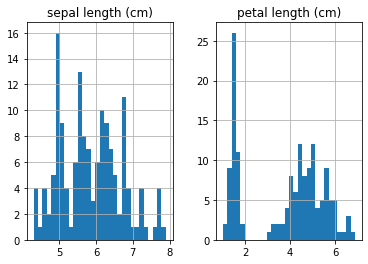

In [7]:
small_iris_data.hist(bins=30)


### ■ Ska några attribut plockas bort?

Nej det behövs inte därför att det finns bara attributer som vi kommer att behöva använda för vår data analys.


### ■ Behövs datan normaliseras?

Normalisering är en teknik som ofta används som en del av förberedelsen av data för maskininlärning. Målet med normaliseringen är att ändra värdena för numeriska kolumner i datauppsättningen så att de använder en gemensam skala,och för att vi inte har några data punkter som sticker ut så det behövs inte heller här någon normalisering.

### Finns dubbletter?

In [8]:
print(f'***Small Iris***\n{small_iris_data.duplicated().value_counts()}')


***Small Iris***
False    123
True      27
dtype: int64


Däremot som vi ser att datan innehåller 27 dubbletter av 150 datapunkter

### Saknas värden?

In [9]:
print(f'***Small Iris***\n{small_iris_data.isna().sum()}')

***Small Iris***
sepal length (cm)    0
petal length (cm)    0
dtype: int64


Det saknas inte någon värde.

In [10]:
small_iris_data.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [11]:
class KMeans(object):
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]

        for _ in range(self.max_iter):
            self.labels_ = [self._nearest(self.cluster_centers_, x) for x in X]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            # update the clusters
            self.cluster_centers_ = [c.sum(axis=0) / len(c) for c in X_by_cluster]
        # sum of square distances from the closest cluster
        self.inertia_ = sum(((self.cluster_centers_[l] - x)**2).sum()
                            for x, l in zip(X, self.labels_))
        return self

    def _nearest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    def _distance(self, a, b):
        return np.sqrt(((a - b)**2).sum())

    def predict(self, X):
        return self.labels_

    def transform(self, X):
        return [[self._distance(x, c) for c in self.cluster_centers_] for x in X]

    def fit_predict(self, X):
        return self.fit(X).predict(X)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def score(self, X):
        return -self.inertia_

In [12]:
X_train = small_iris_data[['sepal length (cm)','petal length (cm)']]


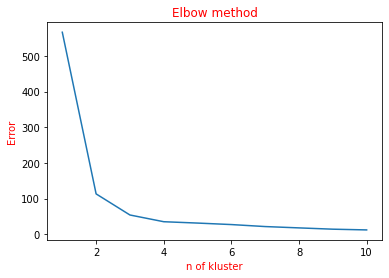

In [15]:
Erorr=[]
x = small_iris_data[['sepal length (cm)','petal length (cm)']]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(x.values)
    Erorr.append(kmeans.inertia_)
plt.plot(range(1,11),Erorr)  
plt.title('Elbow method',color='red')  
plt.xlabel('n of kluster',color='red')  
plt.ylabel('Error',color='red')  
plt.show()


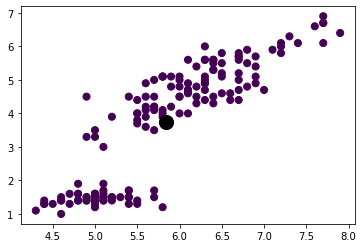

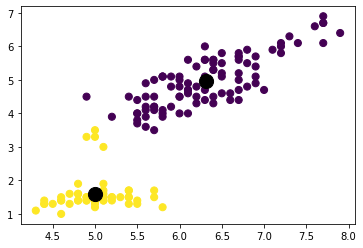

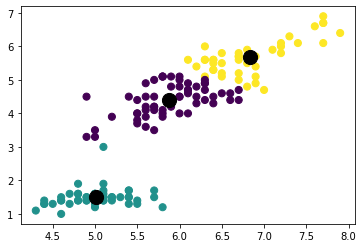

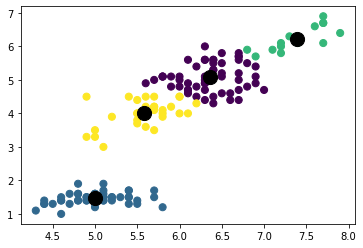

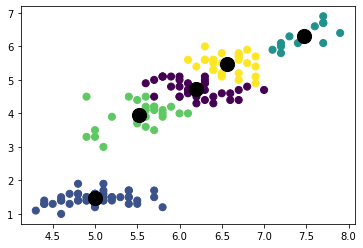

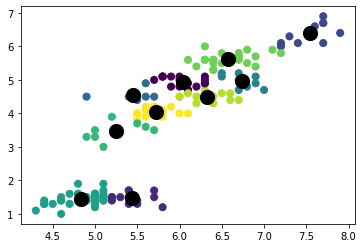

In [14]:
n_culster=[1,2,3,4,5,10]
x=X_train.values

for h in n_culster:
    kmeans = KMeans(n_clusters=h,random_state=42)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)
    plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    for i in range(len(centers)):
        plt.scatter(centers[i][0], centers[i][1], s = 200, c = 'black', label = 'Centroids')
    plt.show()